<a href="https://colab.research.google.com/github/vhinatav/IAT460-FinalProject/blob/main/CreativeSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Colour Palette Generator with a Markov Chain Model**

This system generates a colour palette based on user-provided keywords using a Markov Chain model. It selects colours from predefined themes, constructs a Markov model to determine color transitions, and then visualizes the resulting palette using an image.

##Import Necessary Libraries

In [6]:
# For displaying the generated colour palette as an image.
import matplotlib.pyplot as plt

# For numerical operations and image array creation.
import numpy as np

# For selecting random colours.
import random

# For creating and manipulating images.
from PIL import Image

# For creating a dictionary with default list values.
from collections import defaultdict

##Define Thematic Colour Palettes

This dictionary contains predefined colour palettes for different themes.

In [7]:
# Emotion Verion
colour_palettes = {
    "joy": ["#FFD700", "#FFEC8B", "#FFC107", "#FFDD44", "#F4A000"],
    "happiness": ["#FFDA03", "#FFC300", "#FF5733", "#FFA500", "#F7B733"],
    "love": ["#FF4C4C", "#E60026", "#B22222", "#C71585", "#800000"],
    "passion": ["#FF2400", "#E32636", "#C21807", "#8B0000", "#FF4500"],
    "excitement": ["#FF5733", "#FF4500", "#E67E22", "#D35400", "#C0392B"],
    "anger": ["#B22222", "#8B0000", "#FF0000", "#A52A2A", "#7B241C"],
    "rage": ["#800000", "#5B0000", "#A93226", "#922B21", "#660000"],
    "sadness": ["#5DADE2", "#2874A6", "#154360", "#2C3E50", "#1B4F72"],
    "melancholy": ["#6C757D", "#5D6D7E", "#495057", "#34495E", "#2C3E50"],
    "serenity": ["#85C1E9", "#AED6F1", "#D6EAF8", "#A2D9CE", "#E8F8F5"],
    "calm": ["#B3E5FC", "#81D4FA", "#4FC3F7", "#29B6F6", "#039BE5"],
    "peace": ["#00A86B", "#50C878", "#2F6D5A", "#3B7A57", "#1E4D2B"],
    "trust": ["#1E90FF", "#4682B4", "#5F9EA0", "#008B8B", "#00CED1"],
    "hope": ["#FFD700", "#FFC107", "#FFDD44", "#F4A000", "#F1C40F"],
    "courage": ["#FF5733", "#D84315", "#A93226", "#E74C3C", "#B22222"],
    "fear": ["#2C3E50", "#1C2833", "#0E1A25", "#040F1A", "#000814"],
    "anxiety": ["#6C757D", "#5D6D7E", "#495057", "#2C3E50", "#1B2631"],
    "loneliness": ["#34495E", "#2C3E50", "#1C2833", "#0B0C10", "#000814"],
    "grief": ["#5D6D7E", "#495057", "#2C3E50", "#1B2631", "#0E1A25"],
    "jealousy": ["#9ACD32", "#6B8E23", "#556B2F", "#2E8B57", "#228B22"],
    "envy": ["#76B947", "#4C9A2A", "#2C6A23", "#145A32", "#0B3D02"],
    "shame": ["#6C757D", "#5D6D7E", "#495057", "#343A40", "#2C3E50"],
    "pride": ["#FFD700", "#FF4500", "#FF1493", "#800080", "#00BFFF"],
    "surprise": ["#FF4500", "#FF6347", "#E25822", "#FFD700", "#FFC107"],
    "contentment": ["#FAD7A0", "#F5B041", "#D4AC0D", "#A77E0E", "#8F5902"],
    "gratitude": ["#FFD700", "#FFA500", "#FFC300", "#FFDD44", "#FFEC8B"],
    "nostalgia": ["#D2B48C", "#BC8F8F", "#A0522D", "#8B4513", "#5C4033"],
    "boredom": ["#B0B0B0", "#A9A9A9", "#808080", "#696969", "#585858"],
    "frustration": ["#D9534F", "#C0392B", "#A93226", "#922B21", "#7B241C"],
    "embarrassment": ["#FFC0CB", "#FF69B4", "#DB7093", "#C71585", "#8B3A62"],
    "affection": ["#FFB6C1", "#FF69B4", "#DB7093", "#C71585", "#A52A2A"],
    "compassion": ["#FFDAB9", "#FFE4B5", "#FFDEAD", "#F4A460", "#CD853F"],
    "determination": ["#FF4500", "#E25822", "#D84315", "#B22222", "#8B0000"],
    "confidence": ["#1E90FF", "#4682B4", "#5F9EA0", "#008B8B", "#00CED1"],
    "humility": ["#E0E0E0", "#C0C0C0", "#A9A9A9", "#808080", "#696969"],
    "optimism": ["#FFD700", "#FFEC8B", "#FFC107", "#FFDD44", "#F1C40F"],
    "pessimism": ["#6C757D", "#5D6D7E", "#495057", "#2C3E50", "#1B2631"],
    "curiosity": ["#FFA07A", "#FF7F50", "#FF6347", "#E25822", "#D84315"],
    "playfulness": ["#FF69B4", "#FF1493", "#FF00FF", "#E0115F", "#C71585"],
    "awkwardness": ["#D3D3D3", "#B0B0B0", "#808080", "#696969", "#585858"],
    "isolation": ["#34495E", "#2C3E50", "#1C2833", "#0B0C10", "#000814"],
    "relaxation": ["#98FB98", "#90EE90", "#00FA9A", "#2E8B57", "#228B22"],
    "resentment": ["#9B870C", "#806517", "#654321", "#8B4513", "#5C4033"],
    "trust": ["#1E90FF", "#4682B4", "#5F9EA0", "#008B8B", "#00CED1"],
    "guilt": ["#6C757D", "#5D6D7E", "#495057", "#2C3E50", "#1B2631"],
    "hope": ["#FFD700", "#FFC107", "#FFDD44", "#F4A000", "#F1C40F"],
    "despair": ["#2C3E50", "#1C2833", "#0E1A25", "#040F1A", "#000814"],
    "euphoria": ["#FFD700", "#FF4500", "#FF1493", "#800080", "#00BFFF"],
}

# Random Verion
# colour_palettes = {
#     "sunset": ["#FF5733", "#E67E22", "#D35400", "#C0392B", "#A93226"],
#     "ocean": ["#3498DB", "#5DADE2", "#1B4F72", "#154360", "#2874A6"],
#     "forest": ["#2ECC71", "#27AE60", "#229954", "#145A32", "#0E6655"],
#     "desert": ["#F1C40F", "#F39C12", "#D68910", "#B9770E", "#9C640C"],
#     "twilight": ["#9B59B6", "#8E44AD", "#6C3483", "#5B2C6F", "#4A235A"],
#     "fire": ["#E74C3C", "#C0392B", "#A93226", "#922B21", "#7B241C"],
#     "water": ["#85C1E9", "#5DADE2", "#2874A6", "#1F618D", "#154360"],
#     "sand": ["#FAD7A0", "#F5B041", "#D4AC0D", "#A77E0E", "#8F5902"],
#     "ice": ["#D6EAF8", "#AED6F1", "#85C1E9", "#5DADE2", "#3498DB"],
#     "lava": ["#FF4500", "#E63900", "#C70000", "#8B0000", "#5B0000"],
#     "meadow": ["#A9DFBF", "#58D68D", "#28B463", "#1D8348", "#145A32"],
#     "storm": ["#5D6D7E", "#34495E", "#2C3E50", "#1C2833", "#0B0C10"],
#     "rose": ["#FFC0CB", "#FF69B4", "#DB7093", "#C71585", "#8B3A62"],
#     "gold": ["#FFD700", "#FFC107", "#DAA520", "#B8860B", "#8B6508"],
#     "amethyst": ["#B39DDB", "#9575CD", "#7E57C2", "#5E35B1", "#4A235A"],
#     "emerald": ["#50C878", "#2E8B57", "#1E7040", "#145A32", "#0B5345"],
#     "cherry": ["#FF4C4C", "#E60026", "#B22222", "#800000", "#5B0000"],
#     "midnight": ["#2C3E50", "#1C2833", "#0E1A25", "#040F1A", "#000814"],
#     "autumn": ["#D35400", "#A04000", "#873600", "#6E2C00", "#512E25"],
#     "spring": ["#E8F8F5", "#ABEBC6", "#58D68D", "#28B463", "#1D8348"],
#     "winter": ["#D6EAF8", "#AED6F1", "#85C1E9", "#5DADE2", "#3498DB"],
#     "royal": ["#6A5ACD", "#483D8B", "#4B0082", "#2E1A47", "#1B1B2F"],
#     "shadow": ["#5D6D7E", "#34495E", "#2C3E50", "#1C2833", "#0B0C10"],
#     "peach": ["#FFE5B4", "#FFCBA4", "#FFB07C", "#FF8C42", "#E76F51"],
#     "lavender": ["#E6E6FA", "#D8BFD8", "#CDA4DE", "#B57EDC", "#7B68EE"],
#     "earth": ["#8B4513", "#A0522D", "#D2691E", "#CD853F", "#BC8F8F"],
#     "space": ["#000000", "#1A1A2E", "#16213E", "#0F3460", "#53354A"],
#     "berry": ["#8E44AD", "#9B59B6", "#AF7AC5", "#D2B4DE", "#6C3483"],
#     "dawn": ["#FFC3A0", "#FFA07A", "#FF7F50", "#FF6347", "#D84315"],
#     "dusk": ["#FF8C42", "#D95D39", "#C53030", "#9B2C2C", "#6E1A1A"],
#     "sky": ["#87CEEB", "#00BFFF", "#1E90FF", "#4682B4", "#5F9EA0"],
#     "candy": ["#FF69B4", "#FF1493", "#FF00FF", "#E0115F", "#C71585"],
#     "mint": ["#98FB98", "#90EE90", "#00FA9A", "#2E8B57", "#228B22"],
#     "denim": ["#1E3A5F", "#274C77", "#365486", "#5B84B1", "#8EAEBF"],
#     "jade": ["#00A86B", "#50C878", "#2F6D5A", "#3B7A57", "#1E4D2B"],
#     "mocha": ["#C0A080", "#8B5A2B", "#5C4033", "#4B2E2F", "#3B2F2F"],
#     "flame": ["#FF4500", "#FF6347", "#E25822", "#D84315", "#A52A2A"],
#     "cotton": ["#F8F8FF", "#FFF8E7", "#FFFAF0", "#E3DAC9", "#FAEBD7"],
#     "charcoal": ["#36454F", "#2F4F4F", "#232B2B", "#1C1C1C", "#0F0F0F"],
#     "periwinkle": ["#CCCCFF", "#B0E0E6", "#99C1DE", "#93C5FD", "#7B9FCC"],
#     "copper": ["#B87333", "#B66D32", "#C17E45", "#A05D31", "#8A3324"],
#     "obsidian": ["#0C0C0C", "#1E1E1E", "#2A2A2A", "#353535", "#424242"],
#     "maroon": ["#800000", "#B22222", "#8B0000", "#A52A2A", "#5B0000"],
#     "silver": ["#C0C0C0", "#B0B0B0", "#A9A9A9", "#808080", "#696969"],
#     "platinum": ["#E5E4E2", "#DCDCDC", "#C0C0C0", "#B0B0B0", "#A8A8A8"],
#     "stormy": ["#6C757D", "#5D6D7E", "#495057", "#343A40", "#212529"],
#     "glacier": ["#B0E0E6", "#A7C7E7", "#87CEFA", "#6495ED", "#4682B4"],
#     "onyx": ["#353839", "#2E2E2E", "#242424", "#1C1C1C", "#141414"],
#     "honey": ["#FFD700", "#FFBF00", "#DAA520", "#B8860B", "#8B6508"],
#     "sapphire": ["#0F52BA", "#0050A1", "#003F88", "#002B5B", "#001A3D"],
# }

##Build the Markov Model

This function constructs a Markov model where each colour has a list of possible subsequent colours based on the order they appear in the palettes.

In [8]:
def build_markov_model(palette_data):

    # Initialize a dictionary with lists as default values.
    model = defaultdict(lambda: [])

    # Iterate over the colour list except the last item.
    for i in range(len(palette_data) - 1):

        # Map each colour to the next colour in sequence.
        model[palette_data[i]].append(palette_data[i + 1])

    # Return the Markov model.
    return model

##Generate a Colour Palette Using Markov

This function creates a palette based on user-selected themes and the Markov model.

In [9]:
def generate_palette_markov(keywords, model, length=5):

    # Initialize an empty list to store starting colours.
    colours = []

    # Select a starting colour from the chosen themes.
    for keyword in keywords:
        if keyword in colour_palettes:
            # Pick a random colour from the theme.
            colours.append(random.choice(colour_palettes[keyword]))

    # If none of the keywords match, return a default gray colour.
    if not colours:
        return ["#808080"]

    # Begin with a randomly chosen colour from the selected themes.
    palette = [random.choice(colours)]

    # Generate the remaining colour using the Markov model.
    for _ in range(length - 1):

        # Pick the next colour based on Markov transition.
        next_colour = random.choice(model.get(palette[-1], palette))

        # Add the chosen colour to the palette.
        palette.append(next_colour)

    # Return the generated palette.
    return palette

##Generate an Image from Colours

This function creates a rectangular image displaying the generated colour palette.

In [10]:
def generate_palette_image(hex_codes):

    # Image height in pixels.
    img_height = 256

    # Each colour block is 64 pixels wide.
    img_width = len(hex_codes) * 64

    # Initialize an empty RGB image array.
    img_array = np.zeros((img_height, img_width, 3), dtype=np.uint8)

    # Convert each hex colour to RGB and fill the corresponding section of the image.
    for i, hex_code in enumerate(hex_codes):

        # Convert hex to RGB.
        base_colour = np.array([int(hex_code[j:j+2], 16) for j in (1, 3, 5)])

        # Assign the colour to the corresponding section.
        img_array[:, i * 64:(i + 1) * 64] = base_colour

    # Convert the NumPy array into an image.
    img = Image.fromarray(img_array, 'RGB')

    # Return the generated image.
    return img

##Main Execution

The main function asks the user for colour-related keywords, generates a colour palette using the Markov model, and displays the resulting palette.

In [19]:
def main():
    # Get user input for three colour-related words.
    keywords = input("Enter three words of emotion (e.g., 'love, joy, sadness'): ").lower().split(", ")

    # Ensure the user enters exactly three keywords.
    if len(keywords) != 3:
        print("Please enter exactly three words.")

        # Exit if the input is invalid.
        return

    # Build the Markov model using all colours from the predefined palettes.
    markov_data = [colour for category in colour_palettes.values() for colour in category]

    # Construct the Markov model.
    markov_model = build_markov_model(markov_data)

    # Generate a colour palette based on the user's keywords.
    hex_codes = generate_palette_markov(keywords, markov_model)

    # Create and display an image of the generated palette.
    img = generate_palette_image(hex_codes)

    # Display the image using Matplotlib.
    plt.imshow(img)

    # Hide the axes for a cleaner presentation.
    plt.axis('off')

    # Show the final output.
    plt.show()

##Run the Script if Executed

If this script is run directly (not imported), execute the main function.

Enter three words of emotion (e.g., 'love, joy, sadness'): love, joy, sadness


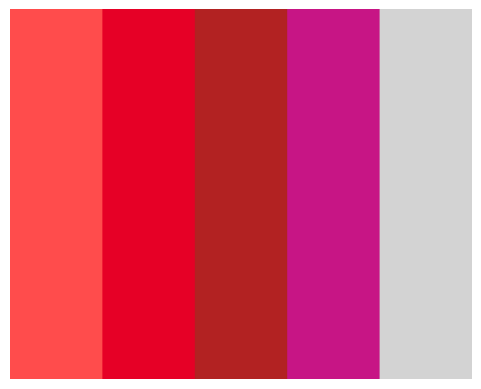

In [38]:
if __name__ == "__main__":
    main()